In [15]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()
import sqlalchemy
%load_ext sql
engine = sqlalchemy.create_engine('postgresql://millbr02:@localhost/movies')

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [16]:
release_dates = pd.read_sql('release_date', engine)

In [17]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [18]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [20]:
rd = release_dates
rd

,title,year,country,date,month,day,dow
0,Meteor,1979,Japan,1979-10-27,10,27,5
1,Meteor,1979,Norway,1979-11-27,11,27,1
2,Meteor,1979,Spain,1979-12-01,12,1,5
3,Meteor,1979,Australia,1979-12-20,12,20,3
4,Meteor,1979,Finland,1979-12-21,12,21,4
5,Meteor,1979,UK,1979-12-21,12,21,4
6,Meteor,1979,France,1980-01-09,1,9,2
7,Meteor,1979,Portugal,1980-01-18,1,18,4
8,Meteor,1979,Denmark,1980-02-01,2,1,4
9,Meteor,1979,Netherlands,1980-02-07,2,7,3


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

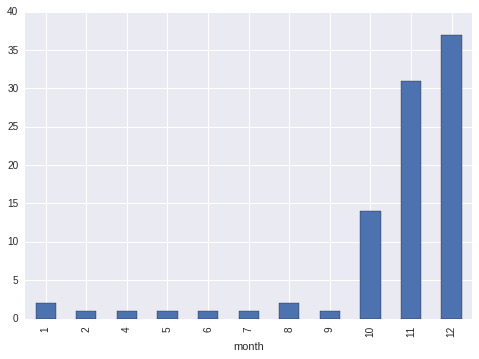

In [25]:
rd[(rd.title.str.contains("Christmas"))&(rd.country == "USA")].groupby(["month"]).size().plot(kind="bar")

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

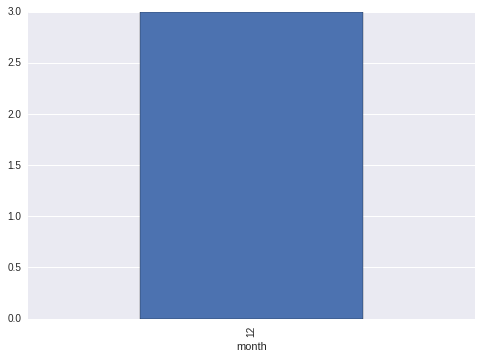

In [27]:
rd[(rd.title.str.startswith("The Hobbit"))&(rd.country == "USA")].groupby(["month"]).size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

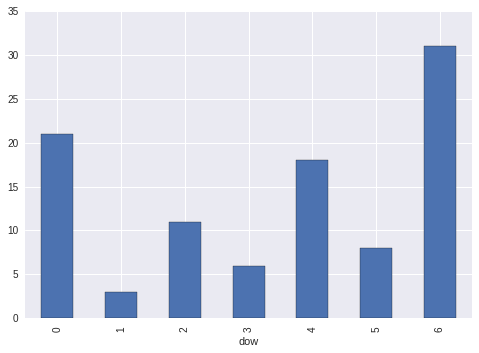

In [28]:
rd[(rd.title.str.contains("Romance"))&(rd.country == "USA")].groupby(["dow"]).size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

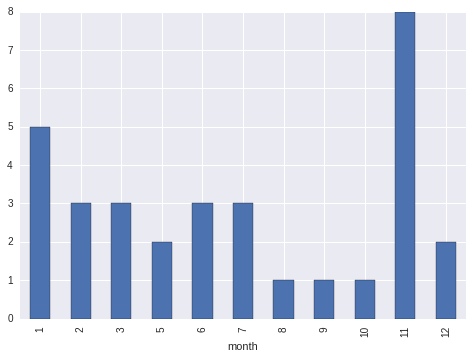

In [29]:
rd[(rd.title.str.contains("Action"))&(rd.country == "USA")].groupby(["month"]).size().plot(kind="bar")

### On which date was each Judi Dench movie from the 1990s released in the USA

In [130]:
a = cast[(cast.name == "Judi Dench")&(cast.year >= 1990)]
a

,title,year,name,type,character,n
2664134,Angelina Ballerina: Angelina Sets Sail,2006,Judi Dench,actress,Miss Lilly,2.0
2664135,Casino Royale,2006,Judi Dench,actress,M,4.0
2664136,Chocolat,2000,Judi Dench,actress,Armande Voizin,18.0
2664138,Die Another Day,2002,Judi Dench,actress,M,6.0
2664139,Doogal,2006,Judi Dench,actress,Narrator,7.0
2664141,GoldenEye,1995,Judi Dench,actress,M,6.0
2664142,Hamlet,1996,Judi Dench,actress,Hecuba,12.0
2664145,Home on the Range,2004,Judi Dench,actress,Mrs. Caloway,7.0
2664146,Iris,2001,Judi Dench,actress,Iris Murdoch,3.0
2664147,J. Edgar,2011,Judi Dench,actress,Annie Hoover,13.0


In [127]:
rd[rd.title == "The Importance of Being Earnest"]

,title,year,country,date,month,day,dow
128621,The Importance of Being Earnest,1952,Denmark,1952-10-15,10,15,2
128622,The Importance of Being Earnest,1952,Sweden,1952-10-20,10,20,0
128623,The Importance of Being Earnest,1952,Portugal,1952-11-20,11,20,3
128624,The Importance of Being Earnest,1952,France,1952-12-31,12,31,2
128625,The Importance of Being Earnest,1952,Finland,1953-03-13,3,13,4
128626,The Importance of Being Earnest,1952,West Germany,1954-01-15,1,15,4
128627,The Importance of Being Earnest,1952,East Germany,1959-09-11,9,11,4
128628,The Importance of Being Earnest,2002,USA,2002-06-21,6,21,4
128629,The Importance of Being Earnest,2002,Australia,2002-07-04,7,4,3
128630,The Importance of Being Earnest,2002,Israel,2002-08-01,8,1,3


In [124]:
rd[(rd.country == "USA")&(rd.title.isin(a.title))&(rd.year.isin(a.year))][["title","date"]]

,title,date
3058,Miss Peregrine's Home for Peculiar Children,2016-03-04
8788,Mrs Brown,1997-07-18
8842,Mrs Henderson Presents,2006-02-17
12169,My Week with Marilyn,2011-12-23
17946,Nine,2009-12-25
20639,Notes on a Scandal,2007-01-26
36358,Philomena,2013-11-27
37797,Pirates of the Caribbean: On Stranger Tides,2011-05-20
42646,Pride & Prejudice,2005-11-23
46457,Quantum of Solace,2008-11-14


### In which months do films with Judi Dench tend to be released in the USA?

In [131]:
c = cast[(cast.name == "Judi Dench")]

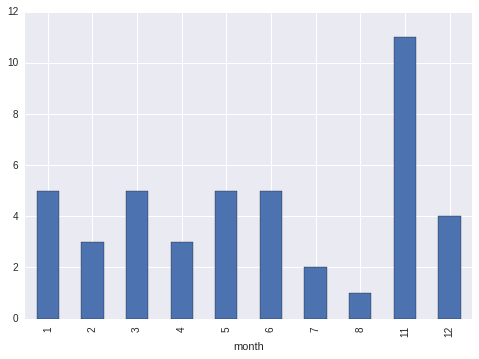

In [135]:
rd[(rd.country == "USA")&(rd.title.isin(c.title))&(rd.year.isin(c.year))][["title","month"]].groupby(["month"]).size().plot(kind="bar")

## In November

### In which months do films with Tom Cruise tend to be released in the USA?

In [136]:
d = cast[(cast.name == "Tom Cruise")]

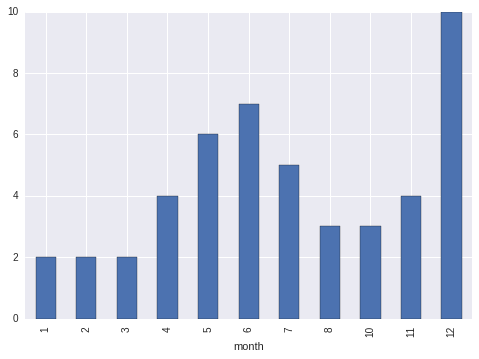

In [137]:
rd[(rd.country == "USA")&(rd.title.isin(d.title))&(rd.year.isin(d.year))][["title","month"]].groupby(["month"]).size().plot(kind="bar")

## In December